<a href="https://colab.research.google.com/github/pt-moynihan/DATA601-Project/blob/main/DATA601_Project_Stage_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1Lv8NU_SuGQ9uVjU8N6_NwNi72qbSnbQL'>

# <font color='lightblue'>Exploritory Data Analysis</font>

In this project you will perform an exploritory data analysis (EDA) using visualizations and correlations. You may choose from one of the datasets within the [class shared data folder](https://drive.google.com/drive/folders/1s2Civxvys_SR1sFF7D2ept1GSmFbICQb?usp=sharing), or search for a dataset that interests you the most! [Kaggle](https://www.kaggle.com/datasets?fileType=csv) is a good place to start, as they often have relatively clean and easy to use datasets, but feel free to explore other places. There is a lot of data out there!

In this project you will:

1.  Choose and download a dataset
2.  Get summary statistics for key variables
3.  Create visuals to help understand your data
4.  Use correlation to measure relationships between key variables
5.  Summarise how EDA helped (or not!) in understanding your dataset



Import python libraries


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## <font color='lightblue'>1. Data </font>

**Action:** Import your data into colaboratory.

For this project I will be analyzing traffic incidents in Calgary. The raw data is available on the City of Calgary's Open Data website at: https://data.calgary.ca/Transportation-Transit/Traffic-Incidents/35ra-9556

Under the terms of the license agreement the data is free to use. Full terms of the license are available at: https://data.calgary.ca/stories/s/Open-Calgary-Terms-of-Use/u45n-7awa



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_traffic_data = pd.read_csv('/content/drive/MyDrive/DATA601 Project 1/traffic_data.csv')

**Action:** Determine the types of data are you dealing with.

The data is a bit of a mess and cannot be analyzed in its raw form.

1) The date format changes part-way through the data set (d-m-Y H:M -> ISO8601)

2) The data will be cleaned and aggregated by five different incident types: multi vehicle incidents, two vehicle incidents, single vehicle incidents, stalled vehicles, and pedestrian incidents. Counts will be generated for the number of incidents each month.

In [ ]:
data_types = df_traffic_data.dtypes
print(data_types)

dates = []
for i in range(len(df_traffic_data)):
    try:
        dates.append(pd.to_datetime(df_traffic_data.iloc[i].start_dt, format='%d-%m-%Y %H:%M'))
    except ValueError:
        dates.append(pd.to_datetime(df_traffic_data.iloc[i].start_dt, format='ISO8601'))

df_traffic_data['start_dt'] = dates

# Drop Rows with Blank/NaN Description
df_traffic_data[df_traffic_data['description'].str.strip().astype(bool)]
df_traffic_data.dropna(subset=['description'], inplace=True)
# Sort Incidents by Date
df_traffic_data.sort_values(by=['start_dt'], ascending=True)

# Filter for Incidents Involving Pedestrians
df_pedestrian_incidents = df_traffic_data.loc[df_traffic_data['description'].str.contains('pedestrian', case=False)]
df_pedestrian_incidents.reset_index(drop=True, inplace=True)

# Filter for Single Vehicle Incidents
df_single_vehicle_incidents = df_traffic_data.loc[df_traffic_data['description'].str.contains('single vehicle', case=False)]
df_single_vehicle_incidents.reset_index(drop=True, inplace=True)

# Filter for Two Vehicle Incidents
df_two_vehicle_incidents = df_traffic_data.loc[df_traffic_data['description'].str.contains('two vehicle', case=False)]
df_two_vehicle_incidents.reset_index(drop=True, inplace=True)

# Filter for Multi Vehicle Incidents
df_multi_vehicle_incidents = df_traffic_data.loc[df_traffic_data['description'].str.contains('multi-vehicle', case=False)]
df_multi_vehicle_incidents.reset_index(drop=True, inplace=True)

# Filter for Stalled Vehicles
df_stalled_vehicle = df_traffic_data.loc[df_traffic_data['description'].str.contains('stalled vehicle', case=False)]
df_stalled_vehicle.reset_index(drop=True, inplace=True)

In [10]:
# %% Count incidents in each month
df_monthly_pedestrian_incidents = df_pedestrian_incidents[['start_dt','description']].rename(columns={'start_dt':'Date','description':'Pedestrian'})
df_monthly_pedestrian_incidents = df_monthly_pedestrian_incidents.resample('MS', on='Date').count()

df_monthly_single_vehicle_incidents = df_single_vehicle_incidents[['start_dt','description']].rename(columns={'start_dt':'Date','description':'Single Vehicle'})
df_monthly_single_vehicle_incidents = df_monthly_single_vehicle_incidents.resample('MS', on='Date').count()

df_monthly_two_vehicle_incidents = df_two_vehicle_incidents[['start_dt','description']].rename(columns={'start_dt':'Date','description':'Two Vehicle'})
df_monthly_two_vehicle_incidents = df_monthly_two_vehicle_incidents.resample('MS', on='Date').count()

df_monthly_multi_vehicle_incidents = df_multi_vehicle_incidents[['start_dt','description']].rename(columns={'start_dt':'Date','description':'Multi Vehicle'})
df_monthly_multi_vehicle_incidents = df_monthly_multi_vehicle_incidents.resample('MS', on='Date').count()

df_monthly_stalled_vehicle_incidents = df_stalled_vehicle[['start_dt','description']].rename(columns={'start_dt':'Date','description':'Stalled Vehicle'})
df_monthly_stalled_vehicle_incidents = df_monthly_stalled_vehicle_incidents.resample('MS', on='Date').count()
#%% Merge All Data Frames
df_traffic_incidents = pd.merge(df_monthly_pedestrian_incidents, df_monthly_stalled_vehicle_incidents, how='inner', on='Date')
df_traffic_incidents = pd.merge(df_traffic_incidents, df_monthly_single_vehicle_incidents, how='inner', on='Date')
df_traffic_incidents= pd.merge(df_traffic_incidents, df_monthly_two_vehicle_incidents, how='inner', on='Date')
df_traffic_incidents = pd.merge(df_traffic_incidents, df_monthly_multi_vehicle_incidents, how='inner', on='Date')



,Pedestrian,Stalled Vehicle,Single Vehicle,Two Vehicle,Multi Vehicle
Date,,,,,
2017-02-01,14,2,56,2,16
2017-03-01,9,13,74,0,20
2017-04-01,12,11,48,127,34
2017-05-01,16,13,50,257,48
2017-06-01,27,8,76,314,65


The cleaned data looks like:

In [14]:
df_traffic_incidents.head()


,Pedestrian,Stalled Vehicle,Single Vehicle,Two Vehicle,Multi Vehicle
Date,,,,,
2017-02-01,14,2,56,2,16
2017-03-01,9,13,74,0,20
2017-04-01,12,11,48,127,34
2017-05-01,16,13,50,257,48
2017-06-01,27,8,76,314,65


In [15]:
df_traffic_incidents.dtypes

,0
Pedestrian,int64
Stalled Vehicle,int64
Single Vehicle,int64
Two Vehicle,int64
Multi Vehicle,int64


## <font color='lightblue'>2. Summary statistics</font>

The summary statistics of each incident type is shown below.

In [25]:
traffic_stats = df_traffic_incidents.describe()
print(traffic_stats)

       Pedestrian  Stalled Vehicle  Single Vehicle  Two Vehicle  Multi Vehicle
count  103.000000       103.000000      103.000000   103.000000     103.000000
mean    20.737864        20.427184       38.116505   151.902913      49.776699
std     10.884385        11.329817       39.275123   111.651727      23.155033
min      0.000000         0.000000        0.000000     0.000000       0.000000
25%     14.000000        13.000000       11.000000    74.500000      34.000000
50%     19.000000        19.000000       23.000000   100.000000      47.000000
75%     26.500000        26.000000       60.000000   251.000000      61.000000
max     70.000000        81.000000      187.000000   397.000000     117.000000


## <font color='lightblue'>3. Visualize the data</font>

**Action:** Visualize the distribution of values for some key variables

**Q1:** Explain your choice of plots using the five visualization components:
1. Data component -- what kinds of data are you dealing with?
2. Graphical component -- what kinds of plot can you use?
3. Label component -- what should be on the plot axis?
4. Esthetic component -- what should you plot say, and how best to do this?
5. Ethical component -- Is the graph misleading, what is left out?

**A1:**
1. All data is numerical.
2. Histograms and Scatter Plots will be used to visualize the data. Since this data is time series, we can also use a line plot to visualize the trend over time.
3. Axes will be clearly labelled
4. I shall leave the plots to speak for themselves
5. In creating the summary data for this part of the project, I removed information about the location and the specific time each incident occurred at. Plotting location and time data is left for future me.

    It also appears that there is an outlier (70 pedestrian incidents, 175 Single vehicle incidents etc.). This will require some investigation. If all of these occured in the same month, then that might indicate a problem with the source data. Again, this is a problem for future me.

**Histograms**

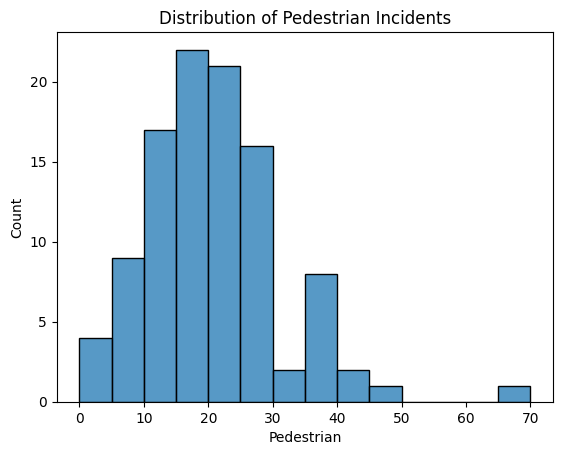

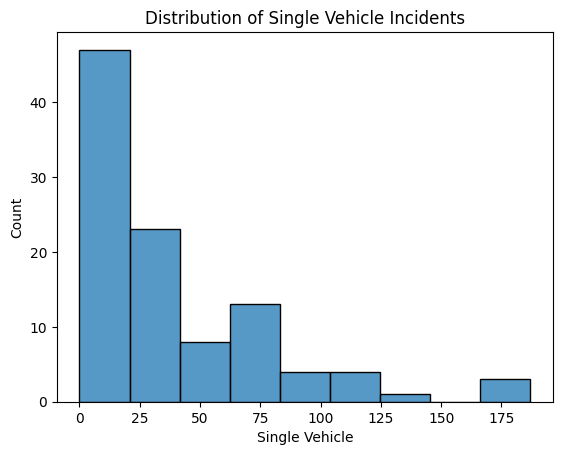

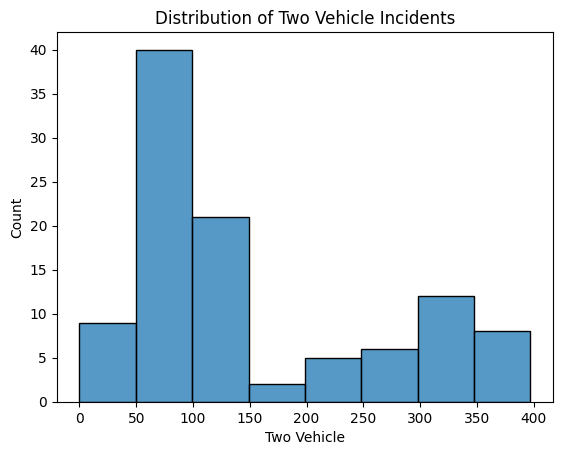

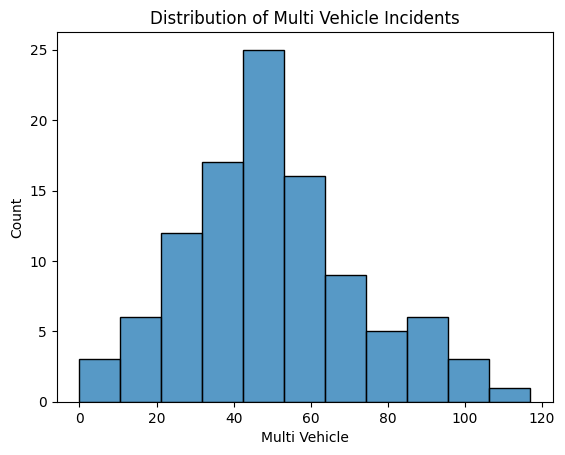

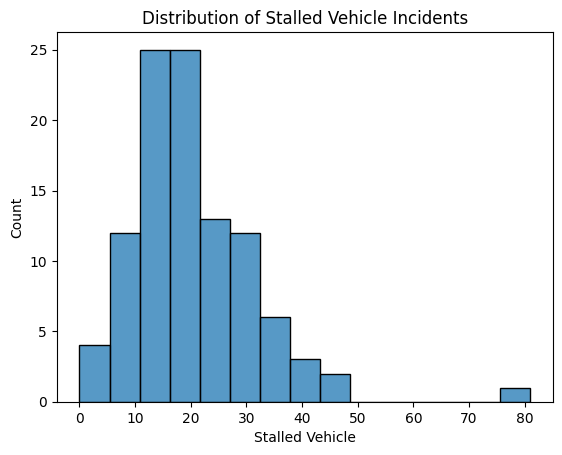

In [39]:
ax = sns.histplot(x=df_traffic_incidents['Pedestrian'])
ax.set(title='Distribution of Pedestrian Incidents', xlabel='Incidents per Month')
plt.show()
ax = sns.histplot(x=df_traffic_incidents['Single Vehicle'])
ax.set(title='Distribution of Single Vehicle Incidents', xlabel='Incidents per Month')
plt.show()
ax = sns.histplot(x=df_traffic_incidents['Two Vehicle'])
ax.set(title='Distribution of Two Vehicle Incidents', xlabel='Incidents per Month')
plt.show()
ax = sns.histplot(x=df_traffic_incidents['Multi Vehicle'])
ax.set(title='Distribution of Multi Vehicle Incidents', xlabel='Incidents per Month')
plt.show()
ax = sns.histplot(x=df_traffic_incidents['Stalled Vehicle'])
ax.set(title='Distribution of Stalled Vehicle Incidents', xlabel='Incidents per Month')
plt.show()



**Scatter Plots**

Only the scatter plots for correlation between two vehicle-multi vehicle incidents and two vehicle-single vehicle incidents will be shown in this section. These two plots will be discussed further in Section 4.

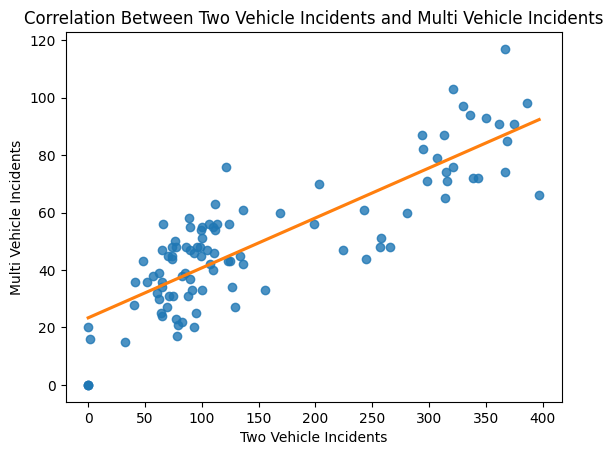

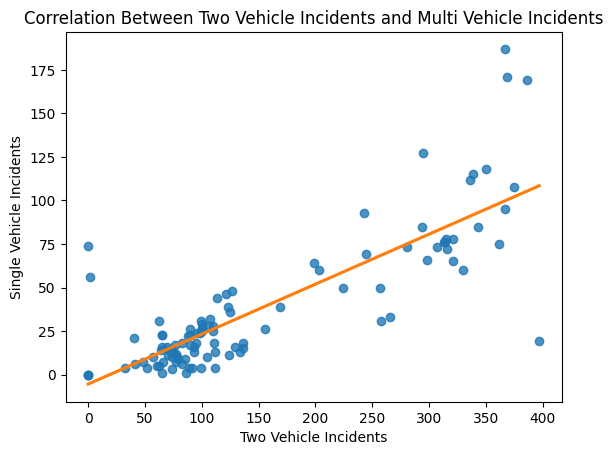

In [45]:
ax = sns.regplot(data=df_traffic_incidents, x='Two Vehicle', y='Multi Vehicle', ci=True, line_kws={'color':'tab:orange'})
ax.set(title='Correlation Between Two Vehicle Incidents and Multi Vehicle Incidents', xlabel='Two Vehicle Incidents', ylabel='Multi Vehicle Incidents')
plt.show()
ax = sns.regplot(data=df_traffic_incidents, x='Two Vehicle', y='Single Vehicle', ci=True, line_kws={'color':'tab:orange'})
ax.set(title='Correlation Between Two Vehicle Incidents and Multi Vehicle Incidents', xlabel='Two Vehicle Incidents', ylabel='Single Vehicle Incidents')
plt.show()

**Trends Over Time**

The time series plots will be shown for single vehicle incidents, two vehicle incidents, and multi vehicle incidents.

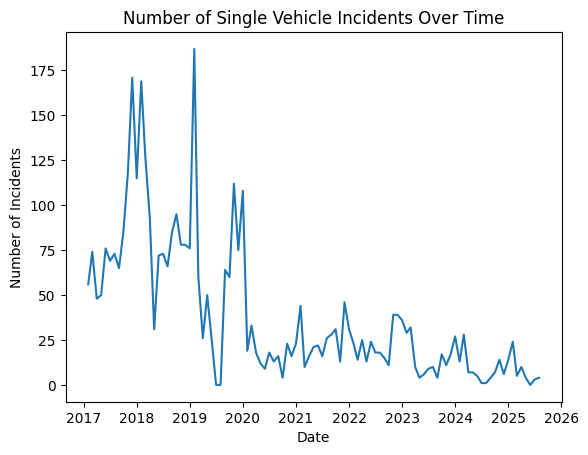

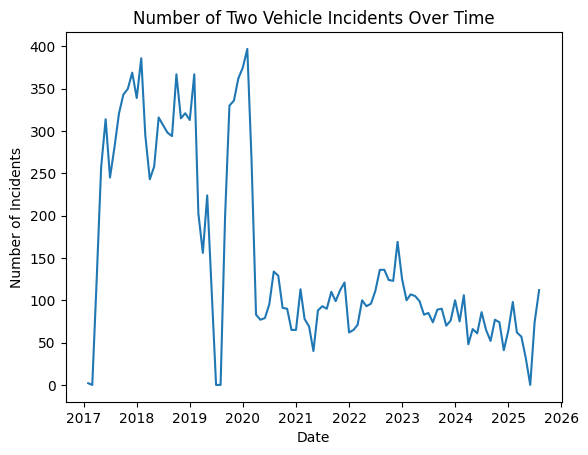

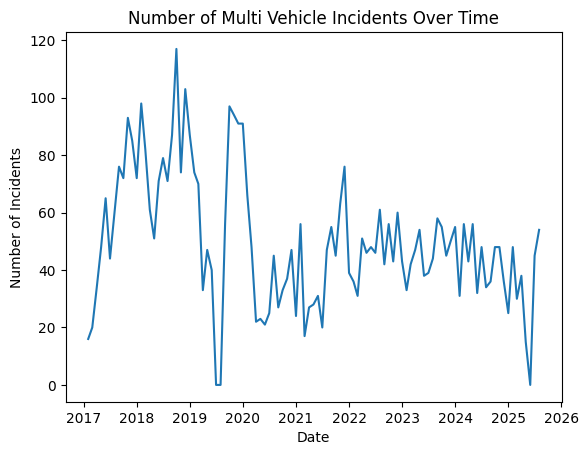

In [47]:
ax = sns.lineplot(data=df_traffic_incidents, x='Date', y='Single Vehicle')
ax.set(title='Number of Single Vehicle Incidents Over Time', xlabel='Date', ylabel='Number of Incidents')
plt.show()
ax = sns.lineplot(data=df_traffic_incidents, x='Date', y='Two Vehicle')
ax.set(title='Number of Two Vehicle Incidents Over Time', xlabel='Date', ylabel='Number of Incidents')
plt.show()
ax = sns.lineplot(data=df_traffic_incidents, x='Date', y='Multi Vehicle')
ax.set(title='Number of Multi Vehicle Incidents Over Time', xlabel='Date', ylabel='Number of Incidents')
plt.show()

## <font color='lightblue'>4. Correlations</font>

**Action:** Use correlation to estimate the relationship between some of the key variables. Try exploring for interesting relationships using heatmaps.

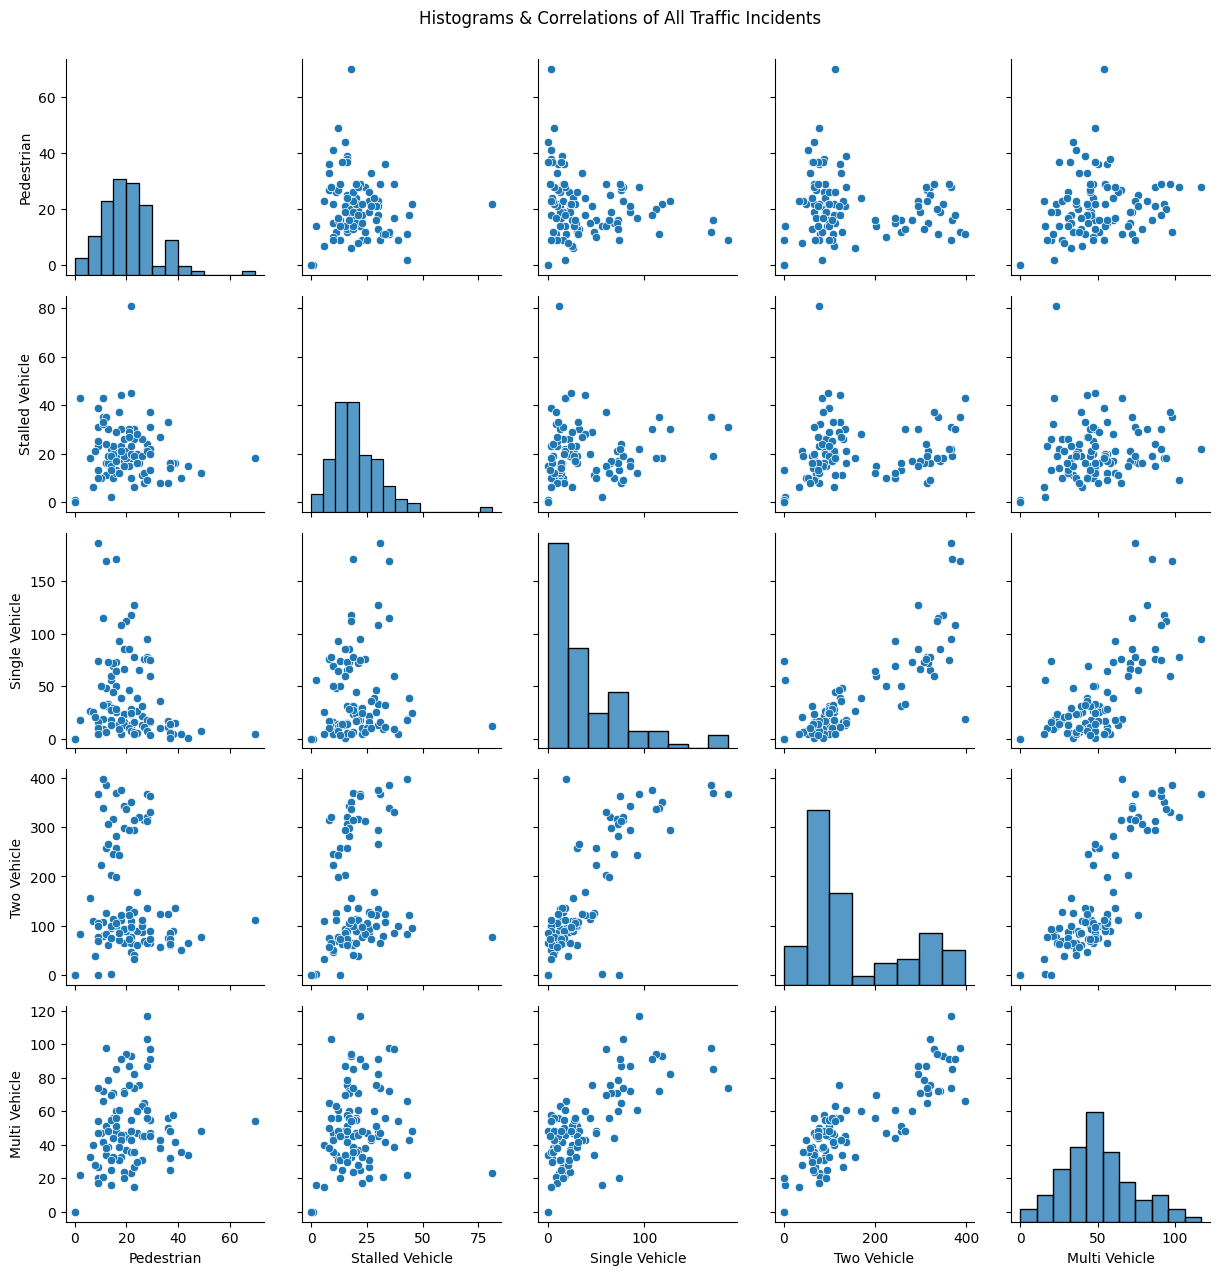

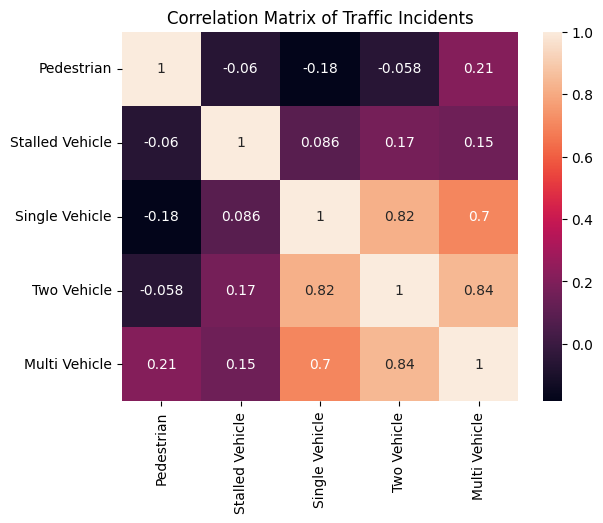

In [55]:
# Pairplot
ax = sns.PairGrid(df_traffic_incidents)
ax.fig.suptitle('Histograms & Correlations of All Traffic Incidents',y=1.02)
ax.map_offdiag(sns.scatterplot)
ax.map_diag(sns.histplot)
plt.show()
# Heatmap
ax = sns.heatmap(df_traffic_incidents.corr(), annot=True)
ax.set_title('Correlation Matrix of Traffic Incidents')
plt.show()


The strongest correlations are between two vehicle incidents-multi vehicle incidents (0.84) and two vehicel incidents-single vehicle incidents (0.82). That these are positively correlated is not suprising; the common causal factor here is most likely the number of vehicles on the road.

**Q2:** Choose one or two correlations and describe what the magnitude and direction of the correlation suggests about the relationship between the two variables.

Let's dive deeper into the correlation between two vehicle incidents-multi vehicle incidents and two vehicle incidents-single vehicle incidents.

Both correlations are positive. This positive correlation is not likely causal. The 'hidden' factor causing both of these to increase at the same time is likely the number of vehicles on the road.

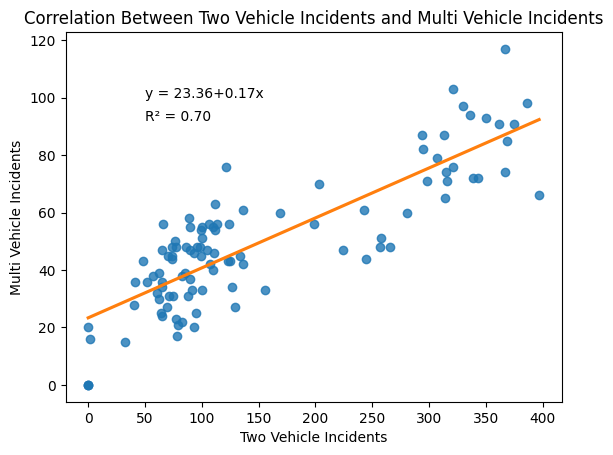

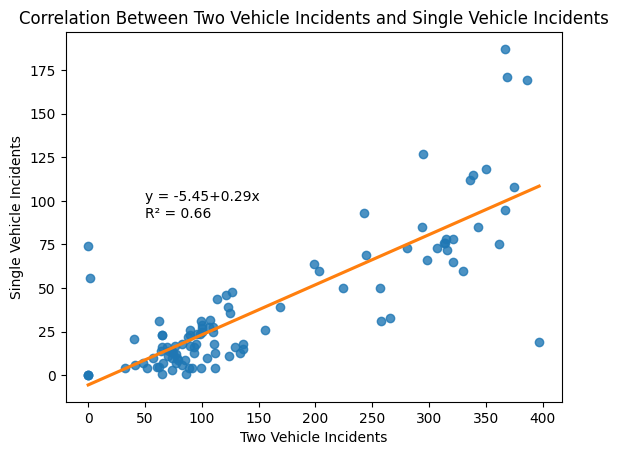

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X1 = df_traffic_incidents['Two Vehicle'].values.reshape(-1, 1)
Y1 = df_traffic_incidents['Multi Vehicle'].values.reshape(-1, 1)
model_1 = LinearRegression().fit(X1,Y1)
r_sq_1= model_1.score(X1, Y1)

ax = sns.regplot(data=df_traffic_incidents, x='Two Vehicle', y='Multi Vehicle', ci=True, line_kws={'color':'tab:orange'})
ax.text(50, 100, f'y = {model_1.intercept_[0]:.2f}+{model_1.coef_[0][0]:.2f}x')
ax.text(50, 92, f'R\N{SUPERSCRIPT TWO} = {r_sq_1:.2f}')
ax.set(title='Correlation Between Two Vehicle Incidents and Multi Vehicle Incidents', xlabel='Two Vehicle Incidents', ylabel='Multi Vehicle Incidents')
plt.show()

X2 = df_traffic_incidents['Two Vehicle'].values.reshape(-1, 1)
Y2 = df_traffic_incidents['Single Vehicle'].values.reshape(-1, 1)
model_2 = LinearRegression().fit(X2,Y2)
r_sq_2= model_2.score(X2, Y2)

ax = sns.regplot(data=df_traffic_incidents, x='Two Vehicle', y='Single Vehicle', ci=True, line_kws={'color':'tab:orange'})
ax.text(50, 100, f'y = {model_2.intercept_[0]:.2f}+{model_2.coef_[0][0]:.2f}x')
ax.text(50, 90, f'R\N{SUPERSCRIPT TWO} = {r_sq_2:.2f}')
ax.set(title='Correlation Between Two Vehicle Incidents and Single Vehicle Incidents', xlabel='Two Vehicle Incidents', ylabel='Single Vehicle Incidents')
plt.show()

## <font color='lightblue'>5. Discussion</font>

**Q3:** Did this exploritory data analysis help you better understand your chosen dataset? If so how? Is there still parts that don't make sense?
> The idea with this question is not to see if you know everything about this dataset, just how EDA might have helped (or not!).

I have not previously taken this deep of a dive into this data set. I thought pedestrian incidents and stalled vehicles would be better correlated with two vehicle incidents (through the hidden factor of number of cars on the road). I think this EDA revealled that I have a tendancy to dive into datasets without first taking the time to understand all of the possible relationships in the data set.